# Sage Shaw

### ME 571 - Spring 2018

# HW 2 - Problem 3

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import timeit

In [275]:
%%bash
mpicc demo_util.c hw3p1_sage.c -o hw3p1_sage -lm
mpirun -n 8 ./hw3p1_sage -p 4 --itermax 200 --tol 1.0e-10 > results.csv

iterations: 200
nodes: 130


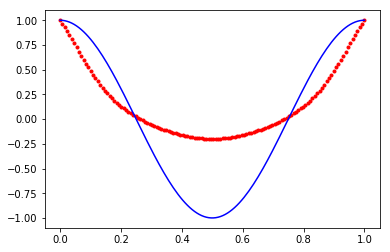

In [276]:
A = np.genfromtxt('results.csv', delimiter=',')
print("iterations: %d" % A[-1])
A = A[:-1]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

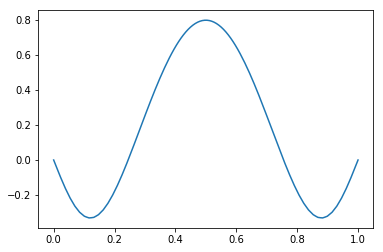

In [277]:
plt.plot(x, A - np.cos(2*np.pi*x))